In [1]:
# HPC
import netCDF4 as nc
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

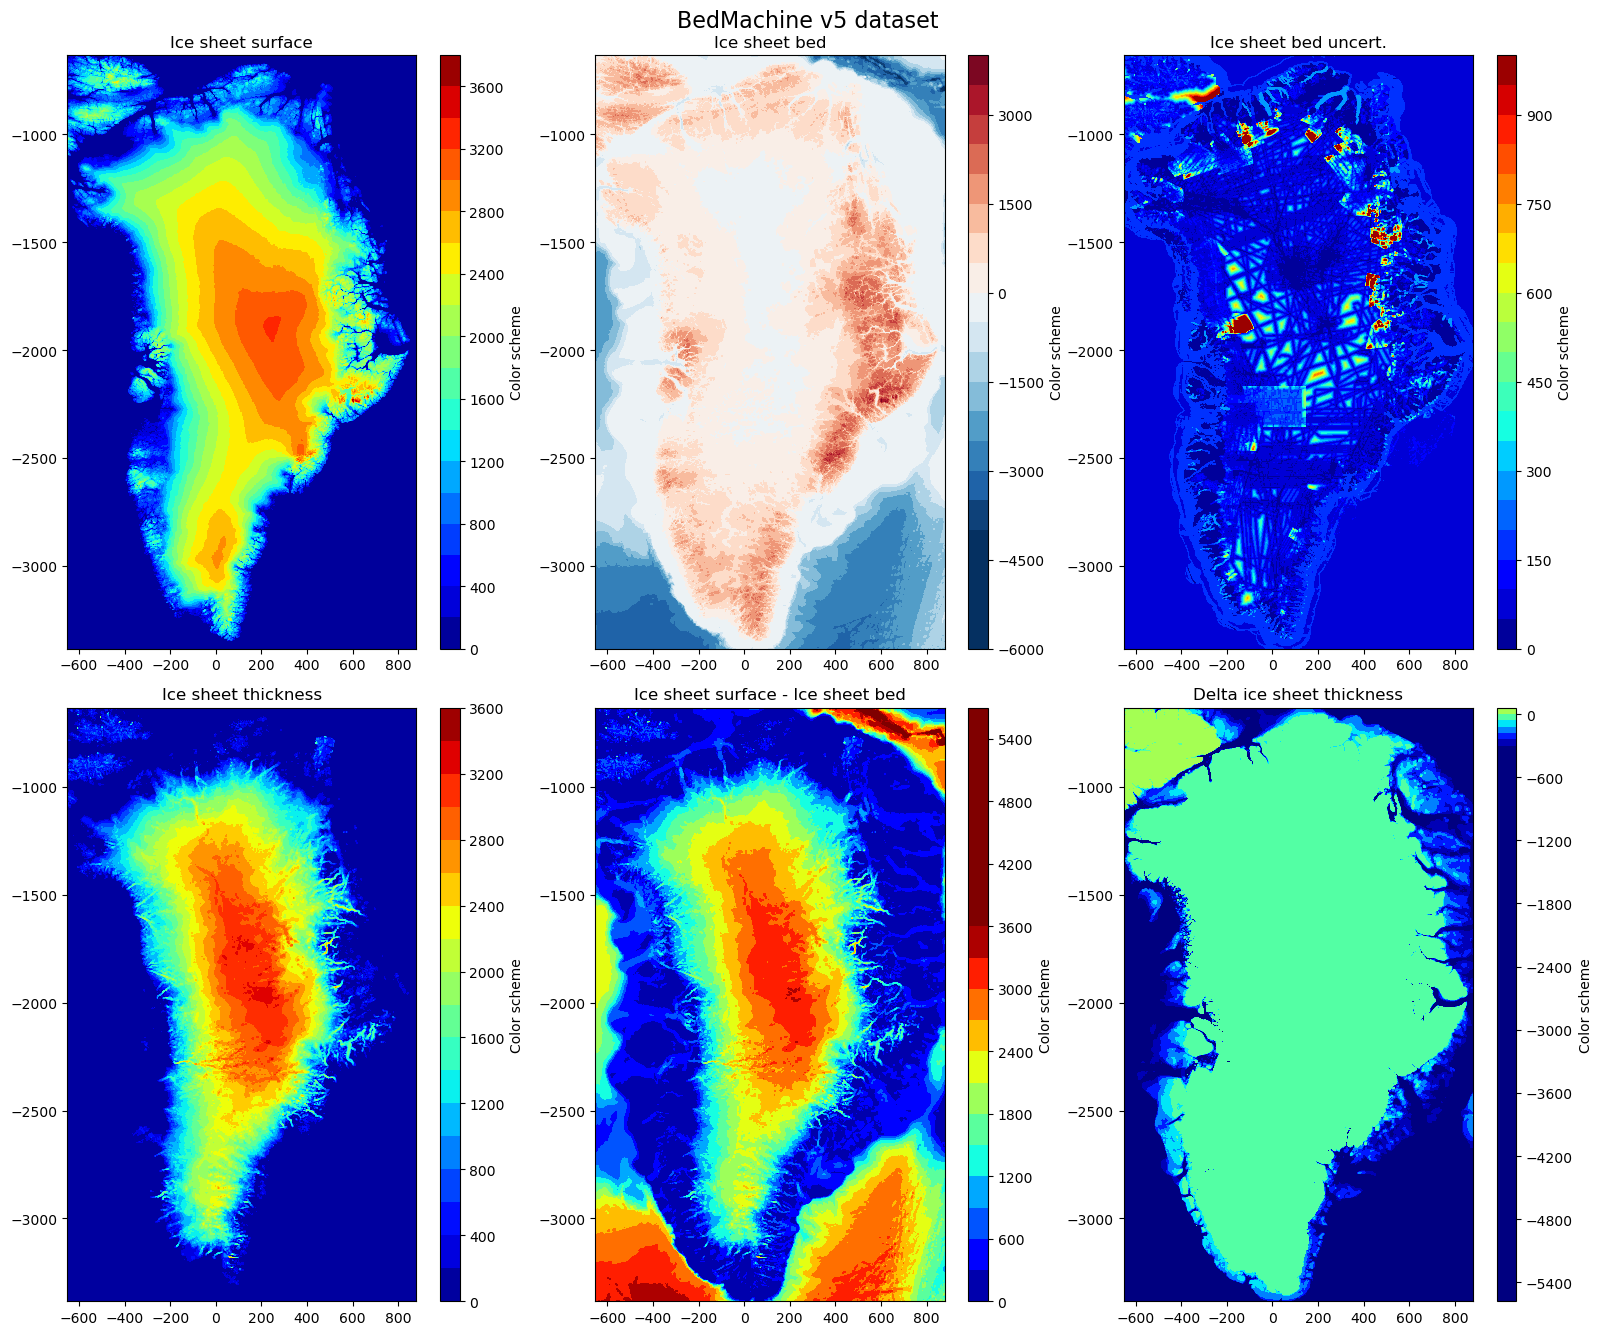

In [2]:
### Load data

dataPath = '/scratch2/shreyas/GrIS_paleo_data/'
ds_temp = xr.open_dataset(dataPath + 'RDBTS4_Greenland_1993_2017_02_basal_thermal_state.nc')
ds_vel  = xr.open_dataset(dataPath + 'RDGBV4_Greenland_1993_2013_01_balance_velocity_9ka.nc')
ds_bm5  = xr.open_dataset(dataPath + 'BedMachineGreenland-v5.nc')
ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')
ds_age_correct = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')

# Convert metres to kms
ds_bm5['x'] = ds_bm5['x']*0.001
ds_bm5['y'] = ds_bm5['y']*0.001
ds_temp['x'] = ds_temp['x']*0.001
ds_temp['y'] = ds_temp['y']*0.001

ds_bm5_40kms = xr.open_dataset(dataPath + 'bm5_data_40kms.nc')
ds_age_40kms = xr.open_dataset(dataPath + 'age_data_40kms.nc')

### Load model outputs

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka/'
ds_model = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka0011.nc')
ds_model40 = modelData.correctModelDataset(ds_model)

n_rows, n_cols = 2, 3
aspect_ratio = len(ds_bm5_40kms['x'])/len(ds_bm5_40kms['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['surface'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0,0])
ax[0,0].set_title('Ice sheet surface')

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['bed'],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0,1],
                         vmin = -4000, vmax = 4000)
ax[0,1].set_title('Ice sheet bed')

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['errbed'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0,2])
ax[0,2].set_title('Ice sheet bed uncert.')

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['thickness'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1,0])
ax[1,0].set_title('Ice sheet thickness')

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['surface']-ds_bm5['bed'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1,1],
                         vmax = 3600)
ax[1,1].set_title('Ice sheet surface - Ice sheet bed')

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['thickness']-(ds_bm5['surface']-ds_bm5['bed']),
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1,2],
                         vmin = -300, vmax = 300)
ax[1,2].set_title('Delta ice sheet thickness')

fig.suptitle('BedMachine v5 dataset', fontsize = 16)
plt.tight_layout()

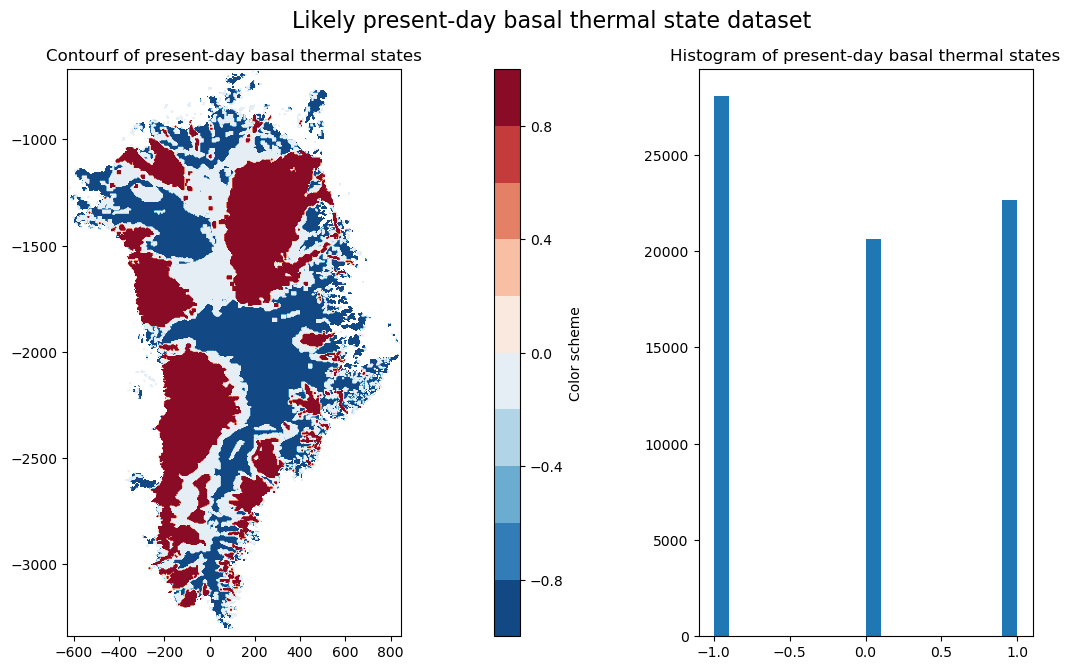

In [3]:
n_rows, n_cols = 1, 2
aspect_ratio = len(ds_bm5_40kms['x'])/len(ds_bm5_40kms['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_temp['x'], ds_temp['y'], 
                         ds_temp['likely_basal_thermal_state'],
                         cmap = 'RdBu_r', nbins = 10, fig = fig, ax = ax[0])
ax[0].set_title('Contourf of present-day basal thermal states')

ax[1].hist(ds_temp['likely_basal_thermal_state'].to_numpy().flatten(), 
           bins = 20)
ax[1].set_title('Histogram of present-day basal thermal states')
fig.suptitle('Likely present-day basal thermal state dataset', fontsize = 16)

plt.tight_layout()

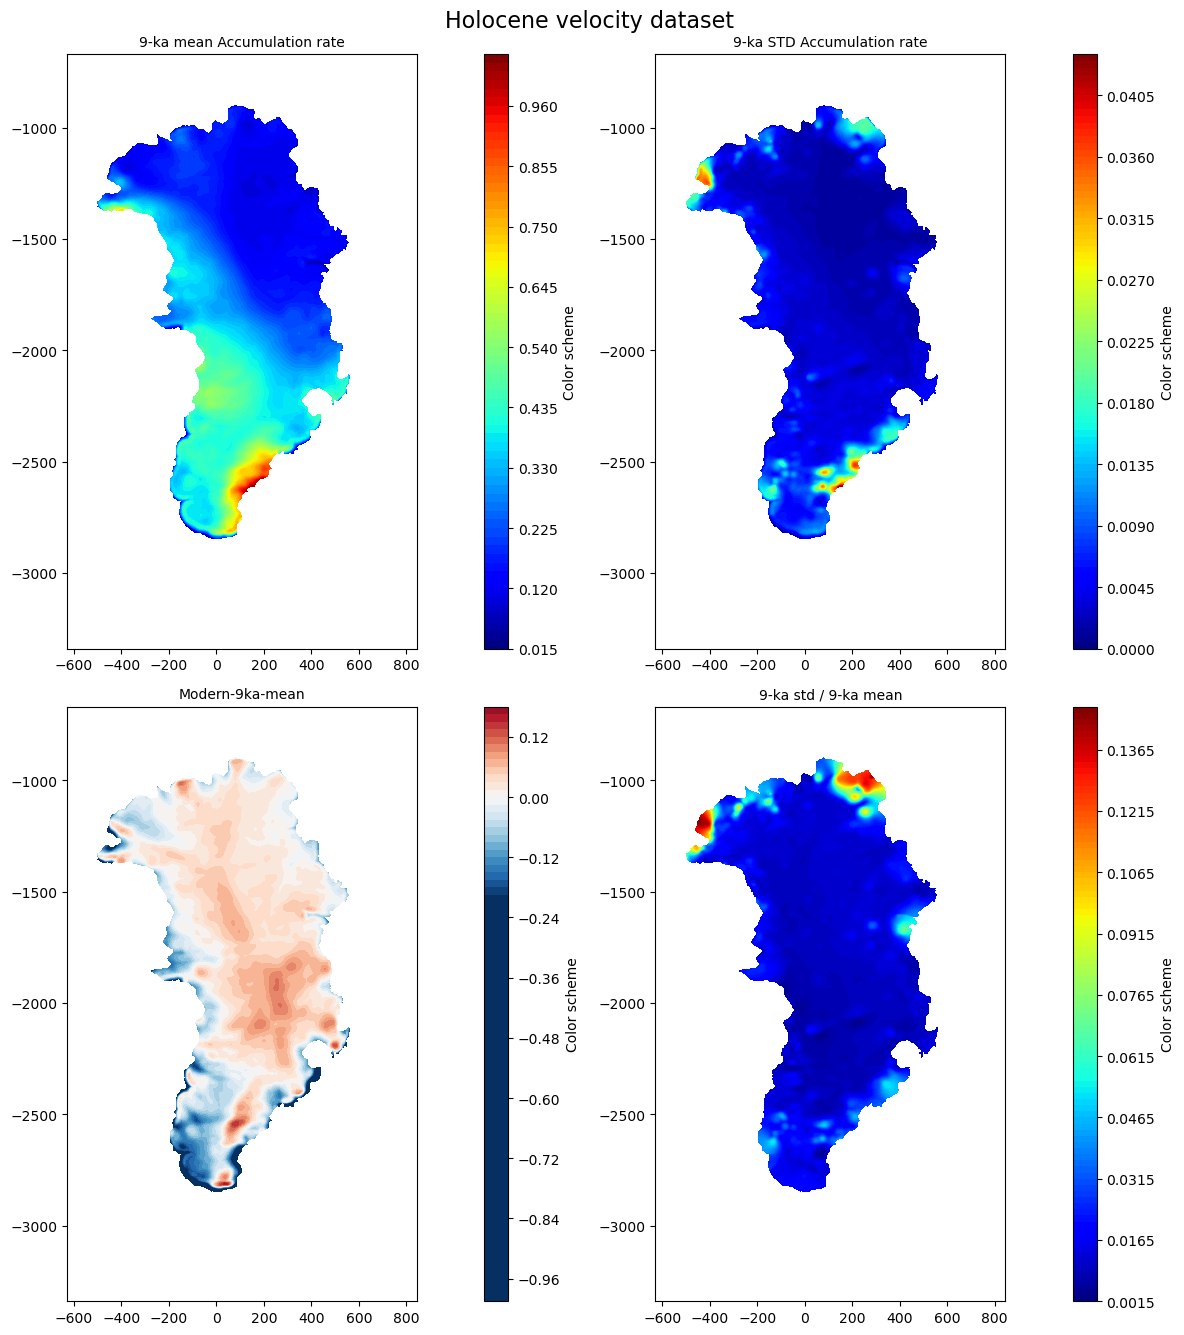

In [4]:
n_rows, n_cols = 2, 2
aspect_ratio = len(ds_bm5_40kms['x'])/len(ds_bm5_40kms['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_temp['x'], ds_temp['y'], 
                         ds_vel['accumulation_rate'][0][:,::-1].T,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[0,0])

ax[0,0].set_title('9-ka mean Accumulation rate', fontsize=10)

### 1 sigma STD
STD = 0.25*(ds_vel['accumulation_rate'][2]-ds_vel['accumulation_rate'][1])
fancyPlotter.plot_normal(ds_temp['x'], ds_temp['y'], 
                         STD[:,::-1].T,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[0,1])

ax[0,1].set_title('9-ka STD Accumulation rate', fontsize=10)

fancyPlotter.plot_normal(ds_temp['x'], ds_temp['y'], 
                         ds_vel['accumulation_rate_difference'][0][:,::-1].T,
                         cmap = 'RdBu_r', nbins = 100, fig = fig, ax = ax[1,0], vmin = -0.2, vmax = 0.2)

ax[1,0].set_title('Modern-9ka-mean', fontsize=10)

fancyPlotter.plot_normal(ds_temp['x'], ds_temp['y'], 
                         STD[:,::-1].T/ds_vel['accumulation_rate'][0][:,::-1].T,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1,1])

ax[1,1].set_title('9-ka std / 9-ka mean', fontsize=10)

fig.suptitle('Holocene velocity dataset', fontsize = 16)
plt.tight_layout()

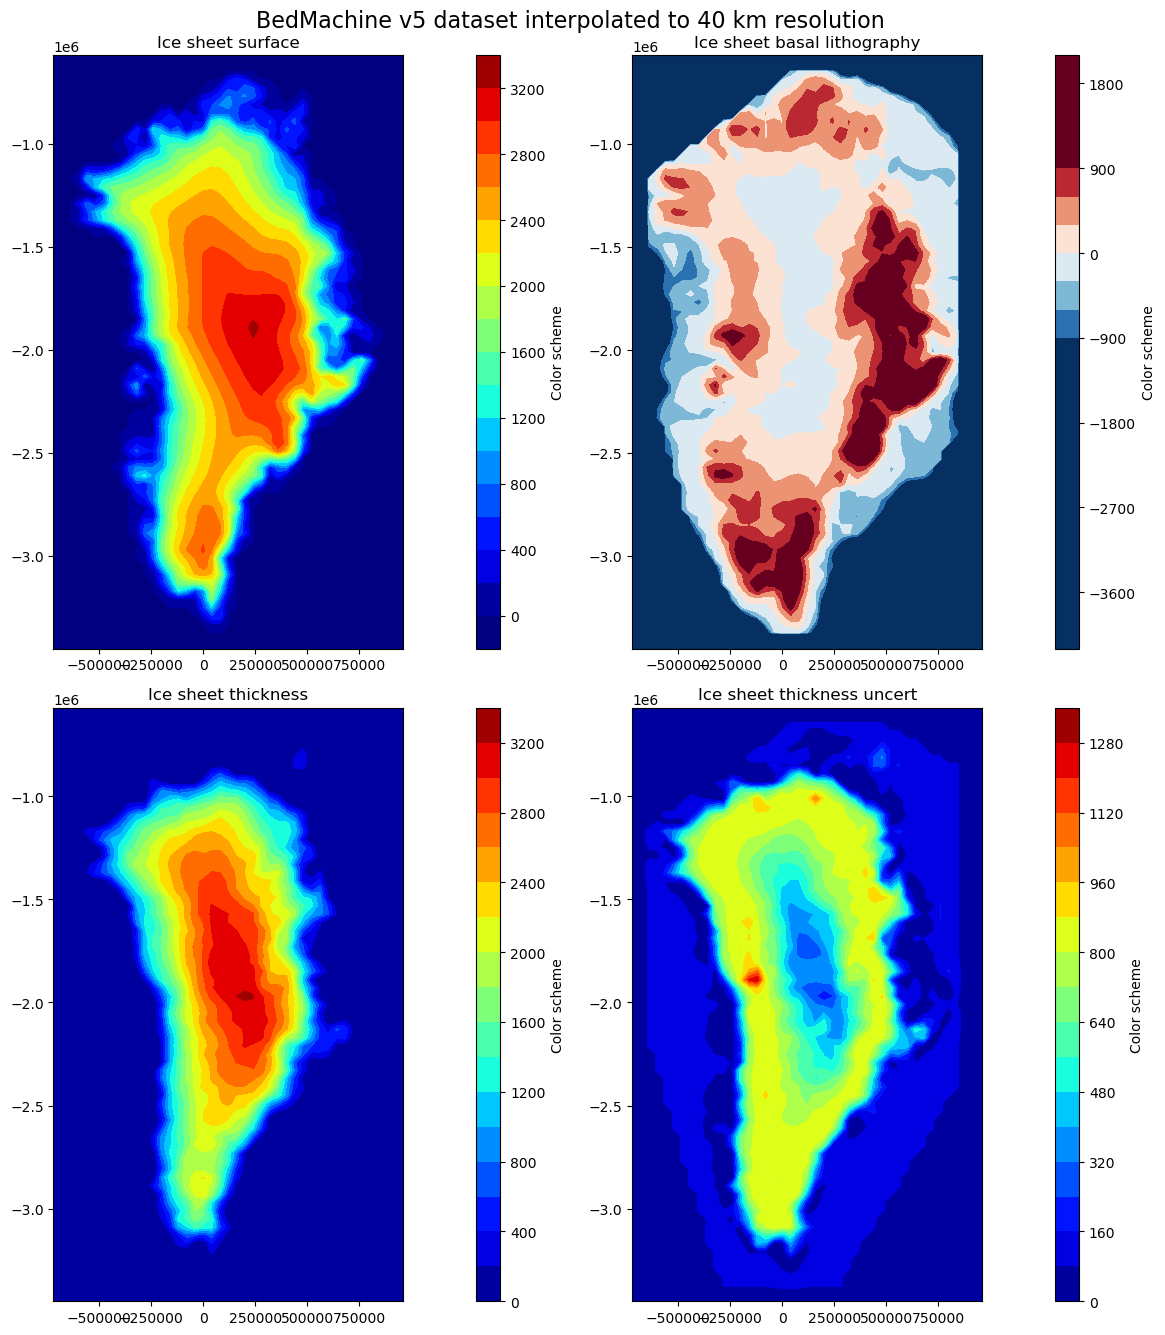

In [5]:
n_rows, n_cols = 2, 2
aspect_ratio = len(ds_bm5_40kms['x'])/len(ds_bm5_40kms['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['zs'],
                         cmap = 'jet', vmin = 0, nbins = 20, fig = fig, ax = ax[0,0])
ax[0,0].set_title('Ice sheet surface')

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['zl'],
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 20, fig = fig, ax = ax[0,1])
ax[0,1].set_title('Ice sheet basal lithography')

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['H'],
                         cmap = 'jet', vmin = 0, nbins = 20, fig = fig, ax = ax[1,0])
ax[1,0].set_title('Ice sheet thickness')

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['H_uncert'],
                         cmap = 'jet', vmin = 0, nbins = 20, fig = fig, ax = ax[1,1])
ax[1,1].set_title('Ice sheet thickness uncert')

fig.suptitle('BedMachine v5 dataset interpolated to 40 km resolution', fontsize = 16)
plt.tight_layout()

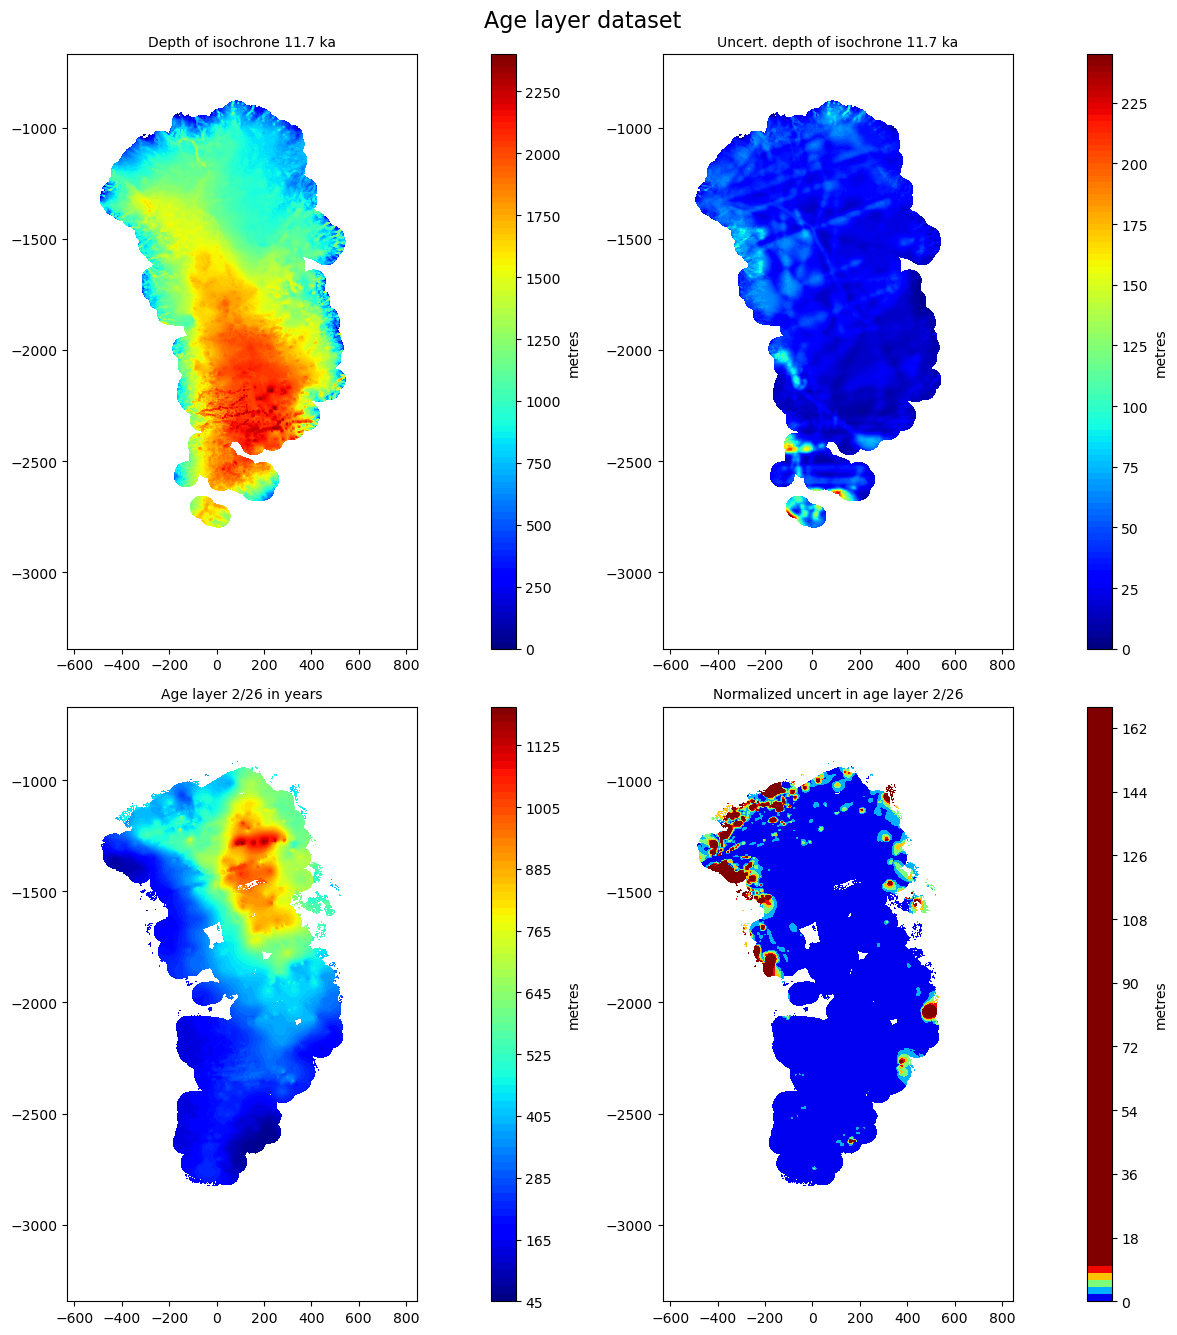

In [6]:
n_rows, n_cols = 2, 2
aspect_ratio = len(ds_bm5_40kms['x'])/len(ds_bm5_40kms['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

age_isochrones = ds_age['age_iso'].data

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age['depth_iso'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,0],
                         cbar_label = 'metres')

ax[0,0].set_title(f'Depth of isochrone {age_isochrones[0]/1000} ka', fontsize=10)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age['depth_iso_uncert'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,1],
                         cbar_label = 'metres')

ax[0,1].set_title(f'Uncert. depth of isochrone {age_isochrones[0]/1000} ka', fontsize=10)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age['age_norm'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[1,0],
                         cbar_label = 'metres')

### Age layer 1/26 is just age 0
ax[1,0].set_title(f'Age layer 2/26 in years', fontsize=10)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age['age_norm_uncert'][0]/ds_age['age_norm'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[1,1],
                         cbar_label = 'metres', vmax = 10)

### Age layer 1/26 is just age 0
ax[1,1].set_title(f'Normalized uncert in age layer 2/26', fontsize=10)

fig.suptitle('Age layer dataset', fontsize = 16)
plt.tight_layout()

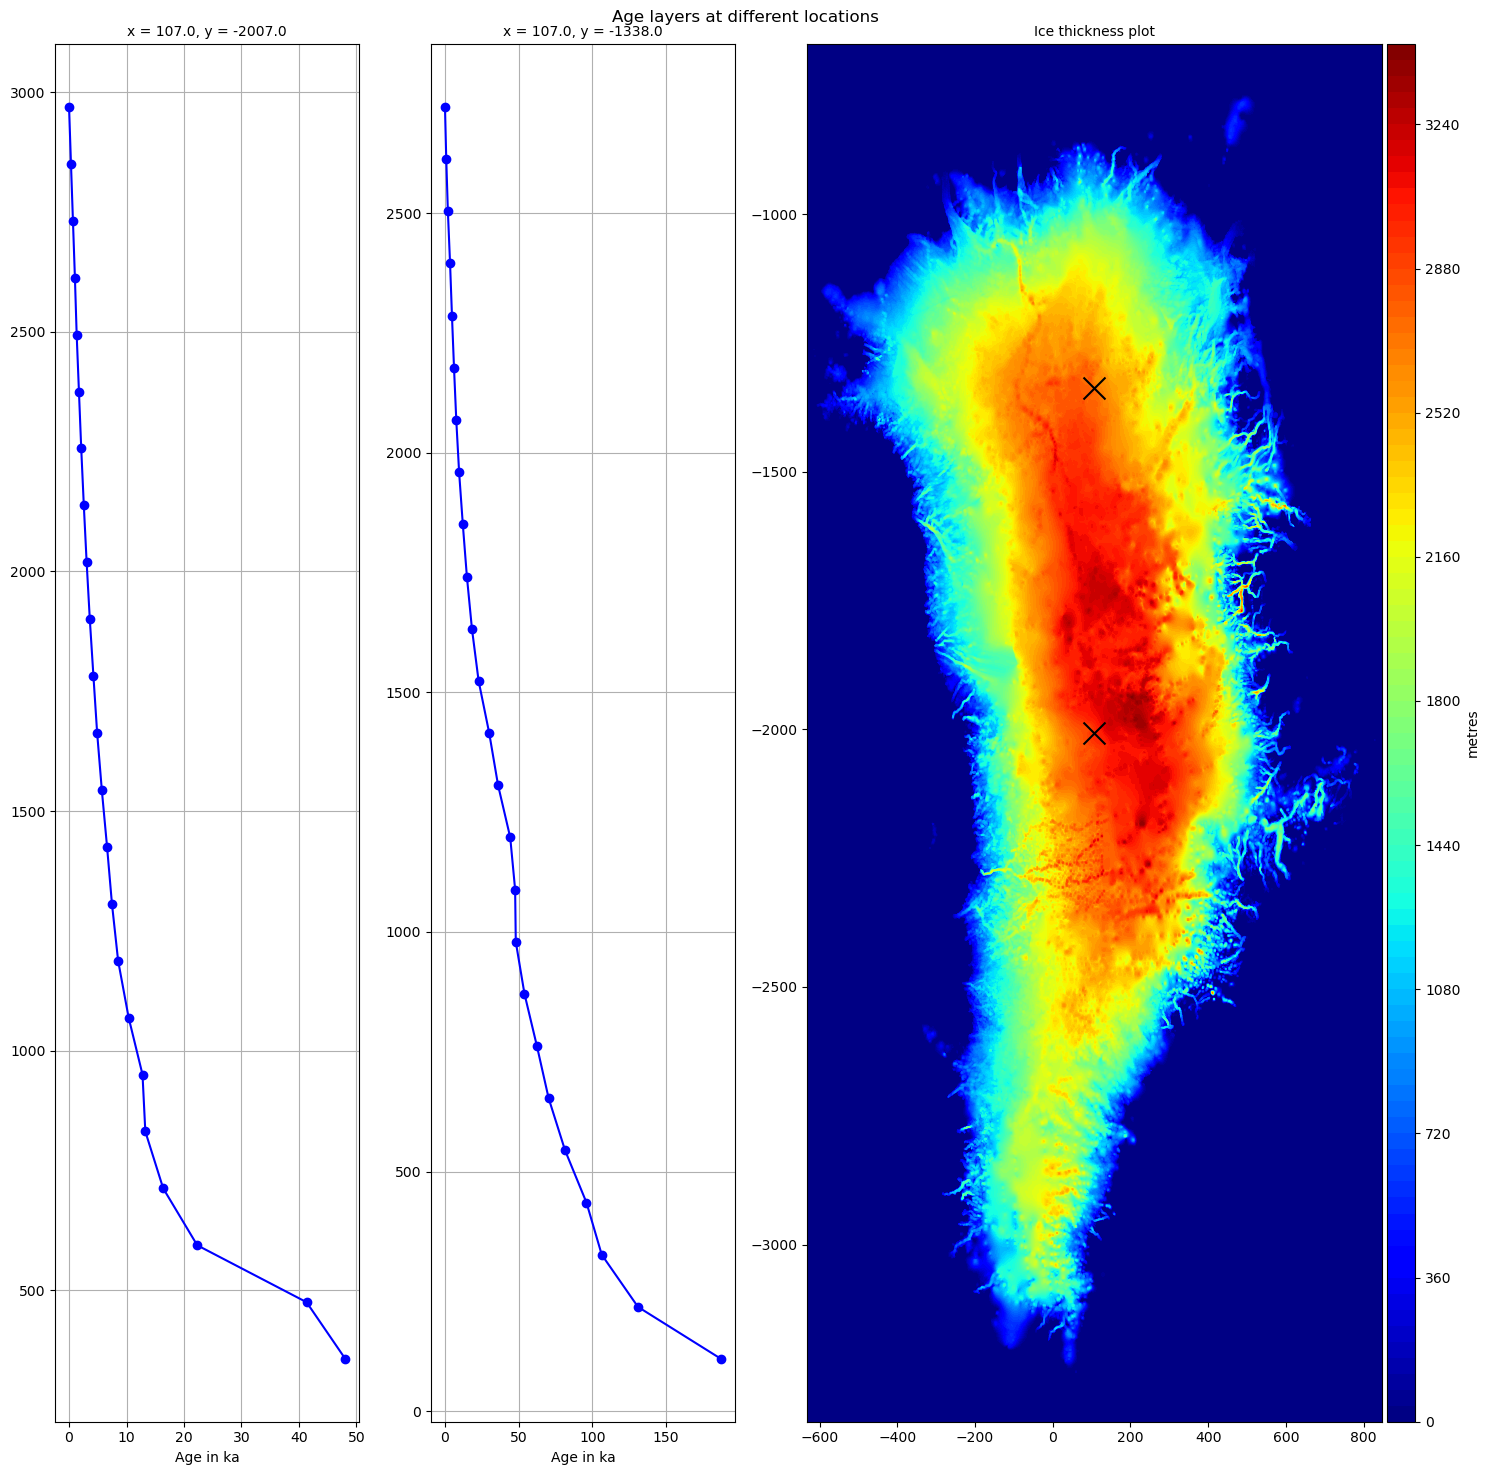

In [7]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(1,3, width_ratios=[1,1,2])

xIndex = int(ds_age_correct['xData'].shape[0]/2)
yIndex = int(ds_age_correct['yData'].shape[0]/2)

xLoc = ds_age_correct['xData'][xIndex].data
yLoc = ds_age_correct['yData'][yIndex].data
age_z = ds_age_correct['age_c'][:,yIndex,xIndex]
depth_z = ds_age_correct['z_minus_zbData'][:,yIndex,xIndex]

fancyPlotter.plot_normal(ds_age_correct['xData'], ds_age_correct['yData'], 
                         ds_age_correct['H'],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[2],
                         cbar_label = 'metres')
ax[2].set_title(f'Ice thickness plot', fontsize=10)

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, None,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-', marker='o', color='b')
ax[0].set_title(f'x = {xLoc}, y = {yLoc}', fontsize=10)
ax[0].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')

xIndex = int(ds_age_correct['xData'].shape[0]/2)
yIndex = int(3*ds_age_correct['yData'].shape[0]/4)

xLoc = ds_age_correct['xData'][xIndex].data
yLoc = ds_age_correct['yData'][yIndex].data
age_z = ds_age_correct['age_c'][:,yIndex,xIndex]
depth_z = ds_age_correct['z_minus_zbData'][:,yIndex,xIndex]

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, None,
                                   fig=fig, ax = ax[1], 
                                   linestyle='-', marker='o', color='b')
ax[1].set_title(f'x = {xLoc}, y = {yLoc}', fontsize=10)
ax[1].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')

fig.suptitle(f'Age layers at different locations')
plt.tight_layout()

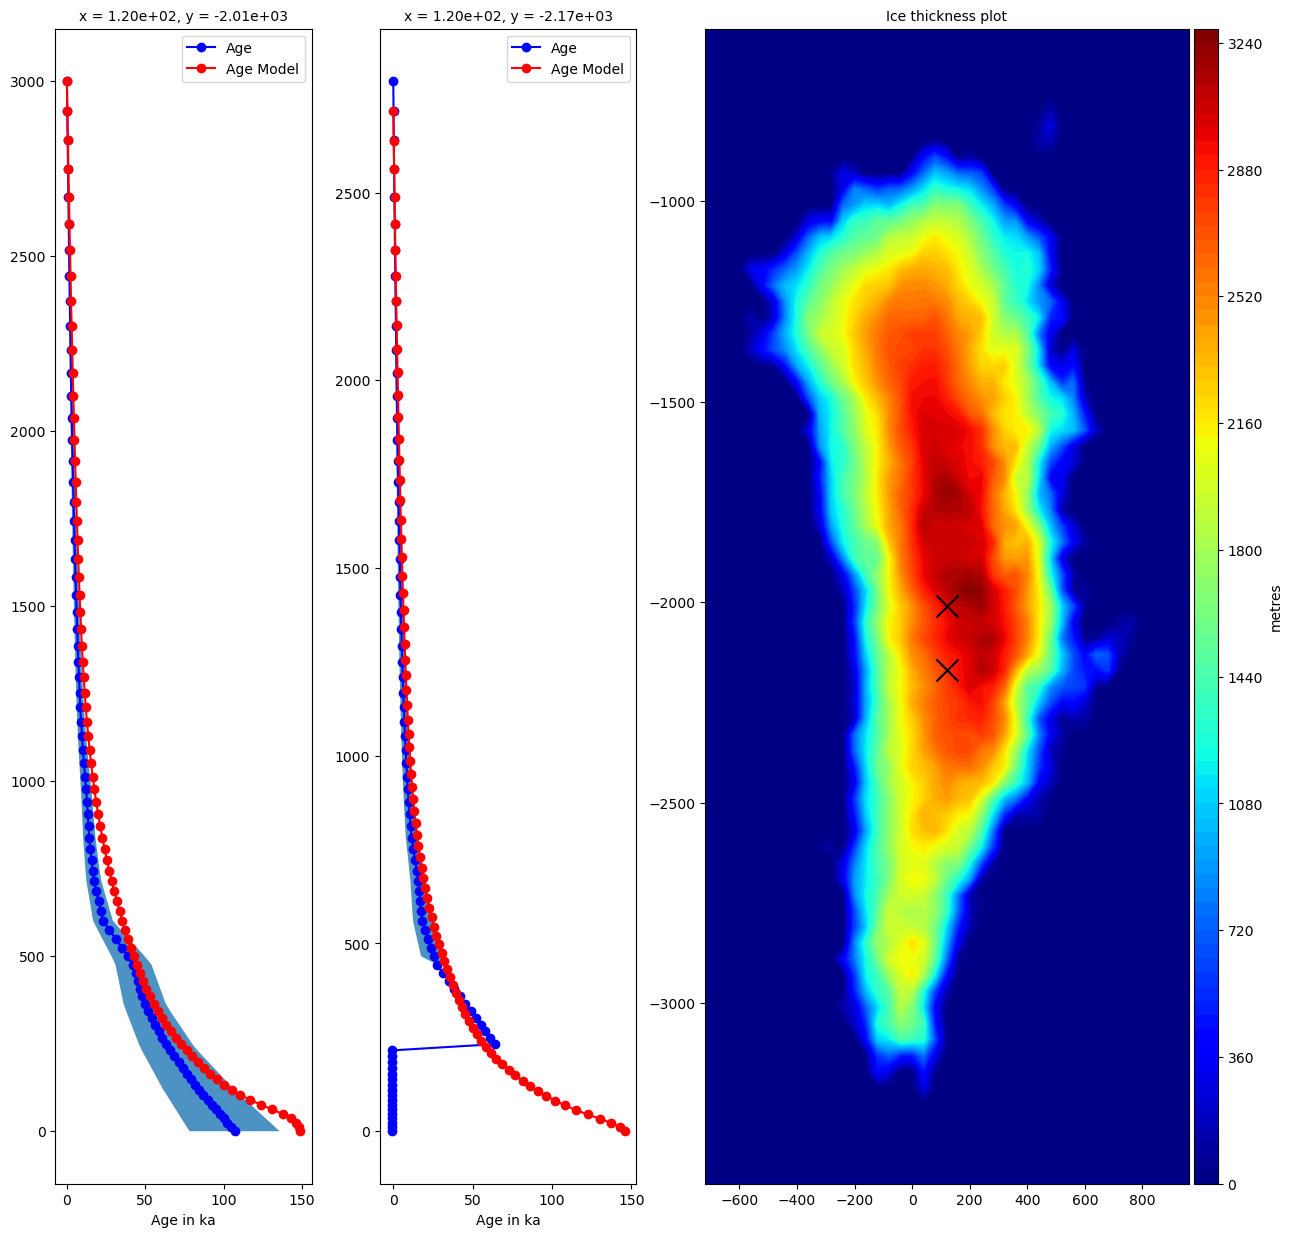

In [8]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(1,3, width_ratios=[1,1,2])

fancyPlotter.plot_normal(ds_age_40kms['x'], ds_age_40kms['y'], 
                         ds_age_40kms['H'],
                         cmap = 'jet', nbins = 100, vmin = 0,
                         fig = fig, ax = ax[2],
                         cbar_label = 'metres')
ax[2].set_title(f'Ice thickness plot', fontsize=10)

xIndex = int(ds_age_40kms['x'].shape[0]/2)
yIndex = int(ds_age_40kms['y'].shape[0]/2)

xLoc = ds_age_40kms['x'][xIndex].data
yLoc = ds_age_40kms['y'][yIndex].data
age_z = ds_age_40kms['age_c'][:,yIndex,xIndex]
age_z_uncert = ds_age_40kms['age_c_uncert'][:,yIndex,xIndex]
age_z_model = ds_model40["age_c"][:,yIndex,xIndex]
depth_z = ds_age_40kms['sigma'].data*ds_age_40kms["H"].data[yIndex, xIndex]
depth_z_model = depth_z.copy()

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, age_z_uncert/1000,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-', marker='o', color='b',
                                   label = 'Age')

fancyPlotter.plot_1D_depth_profile(age_z_model/1000, depth_z_model, None,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-', marker='o', color='r',
                                   label = 'Age Model')

ax[0].set_title(f'x = {xLoc:.2e}, y = {yLoc:.2e}', fontsize=10)
ax[0].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')
ax[0].legend()

xIndex = int(ds_age_40kms['x'].shape[0]/2)
yIndex = int(3*ds_age_40kms['x'].shape[0]/4)

xLoc = ds_age_40kms['x'][xIndex].data
yLoc = ds_age_40kms['y'][yIndex].data
age_z = ds_age_40kms['age_c'][:,yIndex,xIndex]
age_z_uncert = ds_age_40kms['age_c_uncert'][:,yIndex,xIndex]
age_z_model = ds_model40["age_c"][:,yIndex,xIndex]
depth_z = ds_age_40kms['sigma'].data*ds_age_40kms["H"].data[yIndex, xIndex]
depth_z_model = ds_age_40kms['sigma'].data*ds_model40["H"].data[yIndex, xIndex]

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, age_z_uncert/1000*(age_z_uncert >= 0),
                                   fig=fig, ax = ax[1], 
                                   linestyle='-', marker='o', color='b',
                                   label = 'Age')

fancyPlotter.plot_1D_depth_profile(age_z_model/1000, depth_z_model, None,
                                   fig=fig, ax = ax[1], 
                                   linestyle='-', marker='o', color='r',
                                   label = 'Age Model')

ax[1].set_title(f'x = {xLoc:.2e}, y = {yLoc:.2e}', fontsize=10)
ax[1].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')
ax[1].legend()

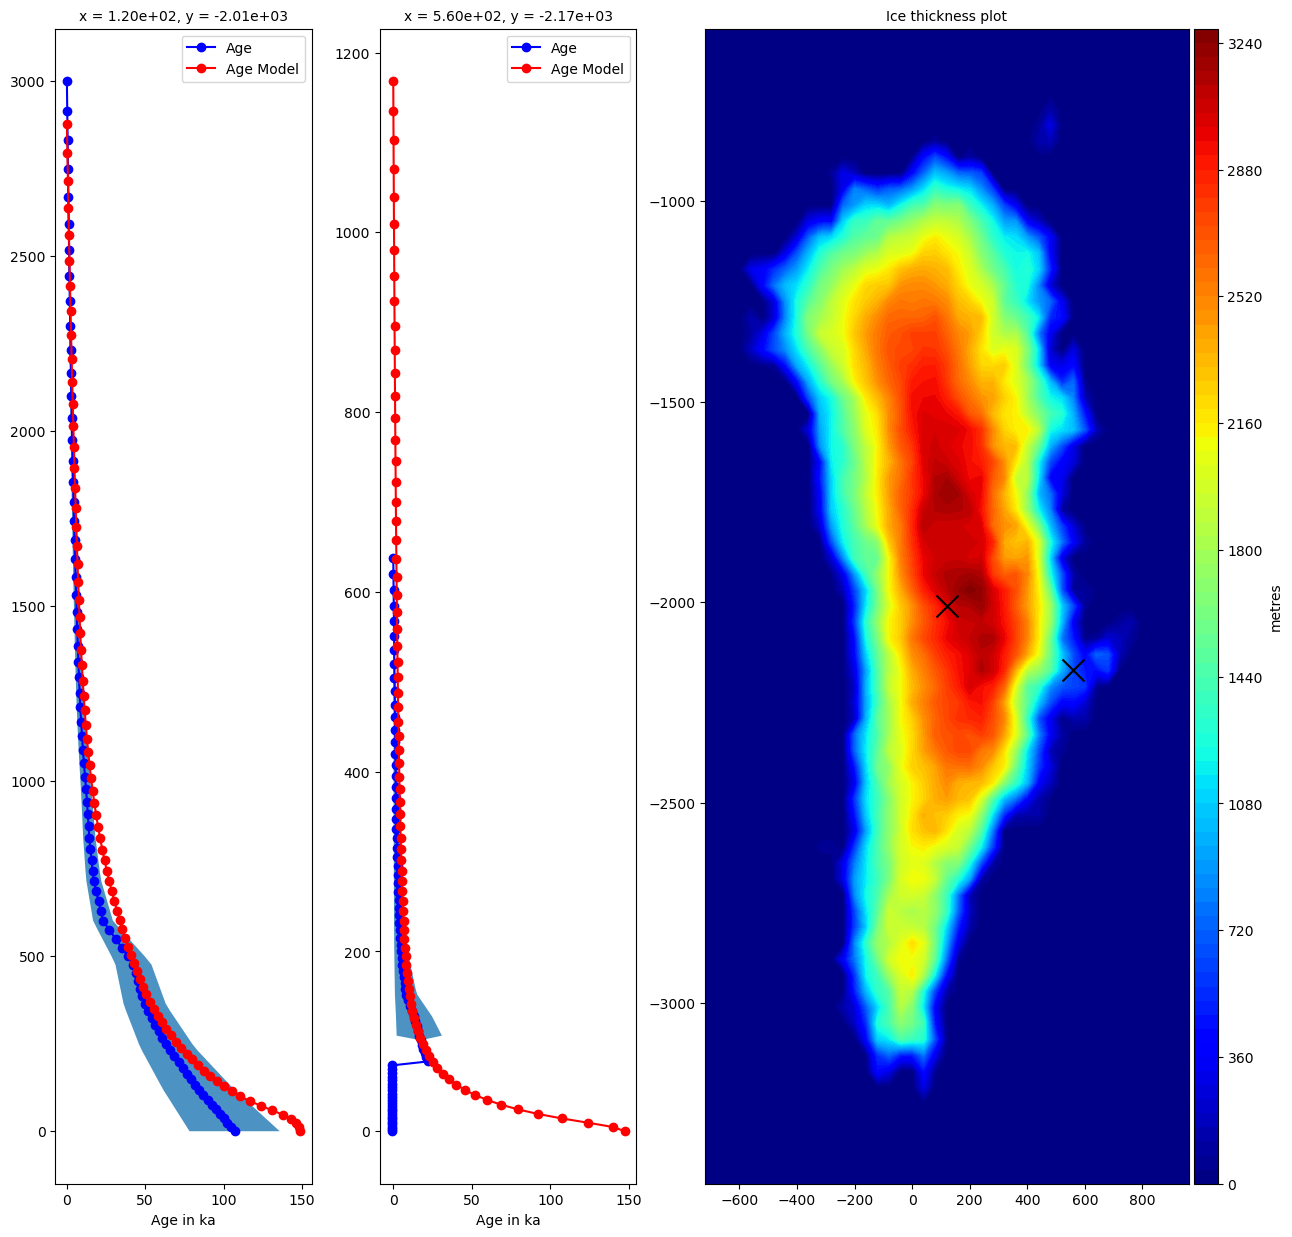

In [9]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(1,3, width_ratios=[1,1,2])

fancyPlotter.plot_normal(ds_age_40kms['x'], ds_age_40kms['y'], 
                         ds_age_40kms['H'],
                         cmap = 'jet', nbins = 100, vmin = 0,
                         fig = fig, ax = ax[2],
                         cbar_label = 'metres')
ax[2].set_title(f'Ice thickness plot', fontsize=10)

xIndex = int(ds_age_40kms['x'].shape[0]/2)
yIndex = int(ds_age_40kms['y'].shape[0]/2)

xLoc = ds_age_40kms['x'][xIndex].data
yLoc = ds_age_40kms['y'][yIndex].data
age_z = ds_age_40kms['age_c'][:,yIndex,xIndex]
age_z_uncert = ds_age_40kms['age_c_uncert'][:,yIndex,xIndex]
age_z_model = ds_model40["age_c"][:,yIndex,xIndex]
depth_z = ds_age_40kms['sigma'].data*ds_age_40kms["H"].data[yIndex, xIndex]
depth_z_model = ds_age_40kms['sigma'].data*ds_model["H"].data[yIndex, xIndex]

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, age_z_uncert/1000,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-', marker='o', color='b',
                                   label = 'Age')

fancyPlotter.plot_1D_depth_profile(age_z_model/1000, depth_z_model, None,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-', marker='o', color='r',
                                   label = 'Age Model')

ax[0].set_title(f'x = {xLoc:.2e}, y = {yLoc:.2e}', fontsize=10)
ax[0].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')
ax[0].legend()

xIndex = int(3*ds_age_40kms['x'].shape[0]/4)
yIndex = int(3*ds_age_40kms['x'].shape[0]/4)

xLoc = ds_age_40kms['x'][xIndex].data
yLoc = ds_age_40kms['y'][yIndex].data
age_z = ds_age_40kms['age_c'][:,yIndex,xIndex]
age_z_uncert = ds_age_40kms['age_c_uncert'][:,yIndex,xIndex]
age_z_model = ds_model40["age_c"][:,yIndex,xIndex]
depth_z = ds_age_40kms['sigma'].data*ds_age_40kms["H"].data[yIndex, xIndex]
depth_z_model = ds_age_40kms['sigma'].data*ds_model["H"].data[yIndex, xIndex]

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, age_z_uncert/1000*(age_z_uncert >= 0),
                                   fig=fig, ax = ax[1], 
                                   linestyle='-', marker='o', color='b',
                                   label = 'Age')

fancyPlotter.plot_1D_depth_profile(age_z_model/1000, depth_z_model, None,
                                   fig=fig, ax = ax[1], 
                                   linestyle='-', marker='o', color='r',
                                   label = 'Age Model')

ax[1].set_title(f'x = {xLoc:.2e}, y = {yLoc:.2e}', fontsize=10)
ax[1].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')
ax[1].legend()